In [1]:
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model
from keras.utils import np_utils
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2020-05-29 01:26:13--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2020-05-29 01:26:14--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf89a93a108e40953a7d552f1d5.dl.dropboxusercontent.com/zip_download_get/AcAKKnUhd1Bk7cF02ryHF3U7h6Cci7-u7exNphfSnd6NWpzjUIY2Rc5t9wrTmWjb24SY4S6z-EwhVPi5JLWQ2h09LHbSzQP7OwISomcduaREFA [following]
--2020-05-29 01:26:15--  https://ucf89a93a108e40953a7d552f1d5.dl.dropboxusercontent.com/zip_download_get/AcAKKnUhd1Bk7cF02ryHF3U7h6Cci7-u7exNphfSnd6NWpzjUIY2Rc5t9wrTmWjb24SY4S6z-EwhVPi5J

In [7]:
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  


In [8]:
!ls 

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


In [0]:
folders = os.listdir("Images")

In [10]:
print(folders)

['cats', 'horses', 'dogs', 'humans']


In [0]:
image_data = []
labels = []

label_dict = {
    "cats": 0,
    "dogs": 1,
    "horses": 2,
    "humans": 3
    }

In [0]:
for ix in folders:
  path = os.path.join("Images",ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=(224,224))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

In [13]:
print(len(image_data),len(labels))

808 808


In [0]:
combined = list(zip(image_data,labels))
random.shuffle(combined)

In [0]:
image_data[:],labels[:] = zip(*combined)

In [16]:
print(labels[:5])

[0, 1, 2, 0, 0]


In [0]:
X_train = np.array(image_data)
Y_train = np.array(labels)

In [18]:
print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808,)


In [0]:
Y_train = np_utils.to_categorical(Y_train)

In [20]:
print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808, 4)


In [21]:
# Creating a Model
model = ResNet50(
    include_top = False,  # Only Convolutional Base without a Classifier
    weights = "imagenet", # Taking weights from pretrained model on imagenet
    input_shape = (224,224,3)
    )

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step


In [22]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
# Final layer will be of 7*7*2048 if apply flatten and hence we can apply Global Average Pooling to convert it into 1*1*2048
# Hence our structure will be Input Layer then Generalised Convolution Base(ResNet50) then we apply GAP and then our own classifier

In [24]:
av1 = GlobalAveragePooling2D()(model.output) # What will be input is in second bracket as model is not declared Sequential
fc1 = Dense(256,activation="relu")(av1)      # Model was ResNet50 but we dropped its classifier
d1 = Dropout(0.5)(fc1)                       # GAP layer takes the mean of each image, in this case 7*7 to 1*1 for 2048
fc2 = Dense(4,activation="softmax")(d1)

model_new = Model(inputs = model.input,outputs= fc2)
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
adam = Adam(lr=0.00003)
model_new.compile(loss="categorical_crossentropy",optimizer=adam,metrics=["accuracy"])

In [26]:
for ix in range(len(model_new.layers)):
  print(ix,model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7eff8b6225c0>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7eff8b164320>
2 <keras.layers.convolutional.Conv2D object at 0x7eff8b1644a8>
3 <keras.layers.normalization.BatchNormalization object at 0x7eff8b164780>
4 <keras.layers.core.Activation object at 0x7eff8b164e10>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7effe3fc56d8>
6 <keras.layers.pooling.MaxPooling2D object at 0x7eff8b164cf8>
7 <keras.layers.convolutional.Conv2D object at 0x7eff8a92de10>
8 <keras.layers.normalization.BatchNormalization object at 0x7eff804713c8>
9 <keras.layers.core.Activation object at 0x7eff80440ac8>
10 <keras.layers.convolutional.Conv2D object at 0x7eff804409b0>
11 <keras.layers.normalization.BatchNormalization object at 0x7eff8044e278>
12 <keras.layers.core.Activation object at 0x7eff80460cc0>
13 <keras.layers.convolutional.Conv2D object at 0x7eff803f5f60>
14 <keras.layers.convolutional.Conv2D object at 0x7eff8040e390>
15 <keras.lay

In [0]:
# So our GAP Layer is at index 175 and for Fine Tuning we need to Back Propagate for few layers from end of Generalized CNN base.
# So lets tune for layer from 169 to 174 and rest part remains non trainable

In [0]:
for ix in range(169):
  model_new.layers[ix].trainable = False

model_new.compile(loss="categorical_crossentropy",optimizer=adam,metrics=["accuracy"])

In [29]:
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [30]:
hist = model_new.fit(X_train,Y_train,shuffle=True,batch_size=16,epochs=10,validation_split=0.2)

Train on 646 samples, validate on 162 samples
Epoch 1/5
646/646 [==============================] - 16s 25ms/step - loss: 1.3777 - accuracy: 0.4102 - val_loss: 0.6652 - val_accuracy: 0.7716
Epoch 2/5
646/646 [==============================] - 7s 10ms/step - loss: 0.6910 - accuracy: 0.7384 - val_loss: 0.4107 - val_accuracy: 0.8765
Epoch 3/5
646/646 [==============================] - 7s 10ms/step - loss: 0.4670 - accuracy: 0.8560 - val_loss: 0.2805 - val_accuracy: 0.9198
Epoch 4/5
646/646 [==============================] - 7s 10ms/step - loss: 0.3688 - accuracy: 0.8808 - val_loss: 0.2453 - val_accuracy: 0.9259
Epoch 5/5
646/646 [==============================] - 7s 10ms/step - loss: 0.2561 - accuracy: 0.9272 - val_loss: 0.2044 - val_accuracy: 0.9506


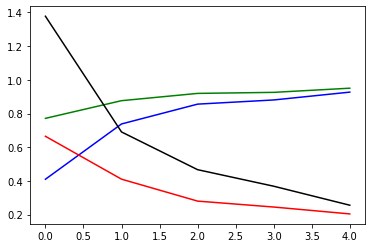

In [33]:
plt.figure(0)
plt.plot(hist.history['accuracy'],'b')
plt.plot(hist.history['val_accuracy'],'g')
plt.plot(hist.history['loss'],'black')
plt.plot(hist.history['val_loss'],'red')
plt.show()